In [3]:
import pandas as pd

# Load the uploaded CSV file
file_path = 'C:/Users/ashut/Downloads/stock.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the data to understand its structure
data.head(), data.columns


(   PK ticker        Date category  \
 0   0   AAPL  27-01-2020  opinion   
 1   1   AAPL  27-01-2020  opinion   
 2   2   AAPL  27-01-2020  opinion   
 3   3   AAPL  27-01-2020  opinion   
 4   4   AAPL  27-01-2020  opinion   
 
                                                title  \
 0  Apple Set To Beat Q1 Earnings Estimates  Tech ...   
 1  Tech Daily  Intel Results  Netflix Surge  Appl...   
 2  7 Monster Stock Market Predictions For The Wee...   
 3  Apple Earnings Preview  5G Launch  Expanding S...   
 4  Buy Surging Apple   Microsoft Stock Before Qua...   
 
                                              content       Open       High  \
 0  Technology giant Apple   NASDAQ AAPL   is set ...  77.514999  77.942497   
 1  The top stories in this digest are Intel s   N...  77.514999  77.942497   
 2  S P 500  SPY \nThis week will be packed with e...  77.514999  77.942497   
 3    Reports Q1 2020 results on Tuesday  Jan  28 ...  77.514999  77.942497   
 4  On today s episode of Full 

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer

# Select relevant numerical and textual columns
numerical_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
textual_columns = ['title', 'content']

# Separate numerical and textual data
numerical_data = data[numerical_columns]
textual_data = data[textual_columns]

# Scale numerical data
scaler = StandardScaler()
scaled_numerical_data = scaler.fit_transform(numerical_data)

# Combine text columns (title + content) for textual processing
combined_textual_data = textual_data['title'] + ' ' + textual_data['content']

# Vectorize textual data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Limiting to top 1000 features for performance
textual_features = tfidf_vectorizer.fit_transform(combined_textual_data)

# Convert the textual features to a dense format and combine with scaled numerical features
import numpy as np

textual_features_dense = textual_features.toarray()
combined_features = np.hstack((scaled_numerical_data, textual_features_dense))

# Define target variable
target = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(combined_features, target, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((800, 1006), (200, 1006), (800,), (200,))

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Initialize and train the Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

accuracy, precision, recall, f1, classification_rep


(0.855,
 0.8947368421052632,
 0.7640449438202247,
 0.8242424242424243,
 '              precision    recall  f1-score   support\n\n           0       0.83      0.93      0.88       111\n           1       0.89      0.76      0.82        89\n\n    accuracy                           0.85       200\n   macro avg       0.86      0.85      0.85       200\nweighted avg       0.86      0.85      0.85       200\n')

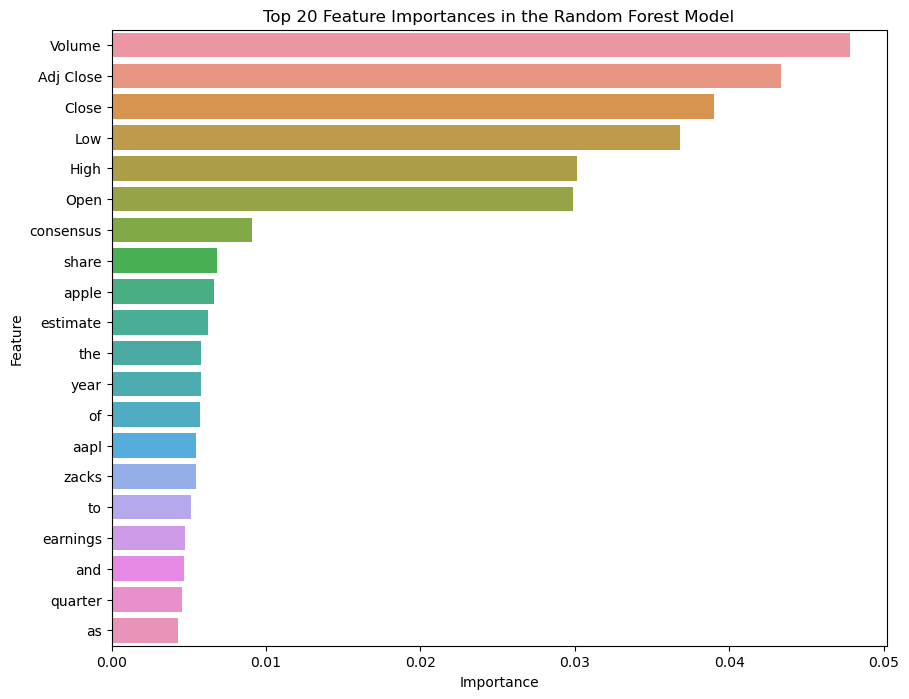

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract feature importances from the trained Random Forest model
feature_importances = rf_model.feature_importances_

# Combine numerical feature names with the TF-IDF features
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
all_feature_names = numerical_columns + list(tfidf_feature_names)

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': feature_importances
})

# Sort the features by importance and select the top 20
top_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(20)

# Plot the top 20 feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=top_features)
plt.title('Top 20 Feature Importances in the Random Forest Model')
plt.show()


In [11]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Load the dataset
data = pd.read_csv('C:/Users/ashut/Downloads/stock.csv')

# Display the first few rows of the dataset
print(data.head())


   PK ticker        Date category  \
0   0   AAPL  27-01-2020  opinion   
1   1   AAPL  27-01-2020  opinion   
2   2   AAPL  27-01-2020  opinion   
3   3   AAPL  27-01-2020  opinion   
4   4   AAPL  27-01-2020  opinion   

                                               title  \
0  Apple Set To Beat Q1 Earnings Estimates  Tech ...   
1  Tech Daily  Intel Results  Netflix Surge  Appl...   
2  7 Monster Stock Market Predictions For The Wee...   
3  Apple Earnings Preview  5G Launch  Expanding S...   
4  Buy Surging Apple   Microsoft Stock Before Qua...   

                                             content       Open       High  \
0  Technology giant Apple   NASDAQ AAPL   is set ...  77.514999  77.942497   
1  The top stories in this digest are Intel s   N...  77.514999  77.942497   
2  S P 500  SPY \nThis week will be packed with e...  77.514999  77.942497   
3    Reports Q1 2020 results on Tuesday  Jan  28 ...  77.514999  77.942497   
4  On today s episode of Full Court Finance here .

In [12]:
import re

# Function to preprocess the text
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # Remove special characters
    return text

# Apply preprocessing to the title column
data['processed_title'] = data['title'].apply(preprocess_text)


In [13]:
# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the processed titles
X = vectorizer.fit_transform(data['processed_title'])


In [14]:
# Extract features (X) and target variable (y)
y = data['Close'].values  # Assuming you're predicting the closing price

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [16]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')


Root Mean Squared Error: 12.297546488458297


In [17]:
# For simplicity, let’s add the previous day’s close price as a feature
data['Prev_Close'] = data['Close'].shift(1)
data.dropna(inplace=True)  # Remove rows with NaN values

# Update target and features
X = vectorizer.transform(data['processed_title'])
X = pd.concat([pd.DataFrame(X.toarray()), data[['Prev_Close']].reset_index(drop=True)], axis=1)
y = data['Close'].values

# Update train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
print(type(X))


<class 'pandas.core.frame.DataFrame'>


In [21]:
# Ensure column names of X are strings
X.columns = [str(i) for i in X.columns]


In [22]:
# Extract additional features
additional_features_df = data[['Prev_Close']].reset_index(drop=True)
additional_features_df.columns = ['Prev_Close']

# Combine TF-IDF features with additional features
X_combined = pd.concat([X, additional_features_df], axis=1)

# Ensure the combined DataFrame has correct column names
X_combined.columns = [str(col) for col in X_combined.columns]


In [23]:
# Update target variable
y = data['Close'].values

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)


In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Initialize and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
print(f'Random Forest - Root Mean Squared Error: {rmse_rf}')


Random Forest - Root Mean Squared Error: 0.9144021107435302


In [25]:
importances = rf_model.feature_importances_
feature_names = X_combined.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df


,Feature,Importance
0,0,0.000000e+00
1,1,0.000000e+00
2,2,4.961299e-06
3,3,0.000000e+00
4,4,0.000000e+00
...,...,...
2729,2729,3.945638e-19
2730,2730,0.000000e+00
2731,2731,0.000000e+00
2732,Prev_Close,5.425664e-01


In [26]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(rf_model, X_combined, y, cv=5, scoring='neg_mean_squared_error')
mean_cv_score = -cv_scores.mean()
rmse_cv = np.sqrt(mean_cv_score)
print(f'Cross-Validated RMSE: {rmse_cv}')


Cross-Validated RMSE: 2.253560767225555


In [27]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize and train the model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)
print(f'Gradient Boosting - Root Mean Squared Error: {rmse_gb}')


Gradient Boosting - Root Mean Squared Error: 0.9011118385859408


In [28]:
from sklearn.svm import SVR

# Initialize and train the model
svr_model = SVR()
svr_model.fit(X_train, y_train)

# Make predictions
y_pred_svr = svr_model.predict(X_test)

# Evaluate the model
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
print(f'Support Vector Regressor - Root Mean Squared Error: {rmse_svr}')


Support Vector Regressor - Root Mean Squared Error: 0.9841105253866157


In [29]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}

grid_search = GridSearchCV(estimator=GradientBoostingRegressor(random_state=42), param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best parameters and model
print(f'Best Parameters: {grid_search.best_params_}')
best_gb_model = grid_search.best_estimator_

# Evaluate the best model
y_pred_best_gb = best_gb_model.predict(X_test)
mse_best_gb = mean_squared_error(y_test, y_pred_best_gb)
rmse_best_gb = np.sqrt(mse_best_gb)
print(f'Best Gradient Boosting - Root Mean Squared Error: {rmse_best_gb}')


Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best Gradient Boosting - Root Mean Squared Error: 0.9011118385859408


In [31]:
# Feature importance for Random Forest
importances = rf_model.feature_importances_
feature_names = X_combined.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)


         Feature  Importance
2732  Prev_Close    0.542566
2733  Prev_Close    0.443266
2508        2508    0.001149
1280        1280    0.000908
1444        1444    0.000742
...          ...         ...
1329        1329    0.000000
1327        1327    0.000000
1326        1326    0.000000
1325        1325    0.000000
0              0    0.000000

[2734 rows x 2 columns]


In [32]:
from sklearn.linear_model import LinearRegression

# Initialize and train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Get coefficients
coefficients = lr_model.coef_
feature_names = X_combined.columns
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coefficients_df = coefficients_df.sort_values(by='Coefficient', ascending=False)
print(coefficients_df)


    Feature   Coefficient
448     448  7.414833e+11
113     113  6.361296e+11
69       69  3.680076e+11
327     327  3.657691e+11
79       79  3.087788e+11
..      ...           ...
13       13 -2.842773e+11
1         1 -3.189289e+11
10       10 -3.285652e+11
318     318 -3.457937e+11
395     395 -4.553269e+11

[2734 rows x 2 columns]


In [35]:
# Check for duplicate column names
duplicate_columns = X_train.columns[X_train.columns.duplicated()]
print(f'Duplicate columns: {duplicate_columns}')


Duplicate columns: Index(['Prev_Close'], dtype='object')


In [36]:
# Rename duplicate columns by appending a suffix
def rename_duplicate_columns(df):
    cols = pd.Series(df.columns)
    for dup in cols[cols.duplicated()].unique(): 
        cols[cols[cols == dup].index.values.tolist()] = [dup + '_' + str(i) if i != 0 else dup for i in range(sum(cols == dup))]
    df.columns = cols

# Rename duplicate columns in X_train
rename_duplicate_columns(X_train)


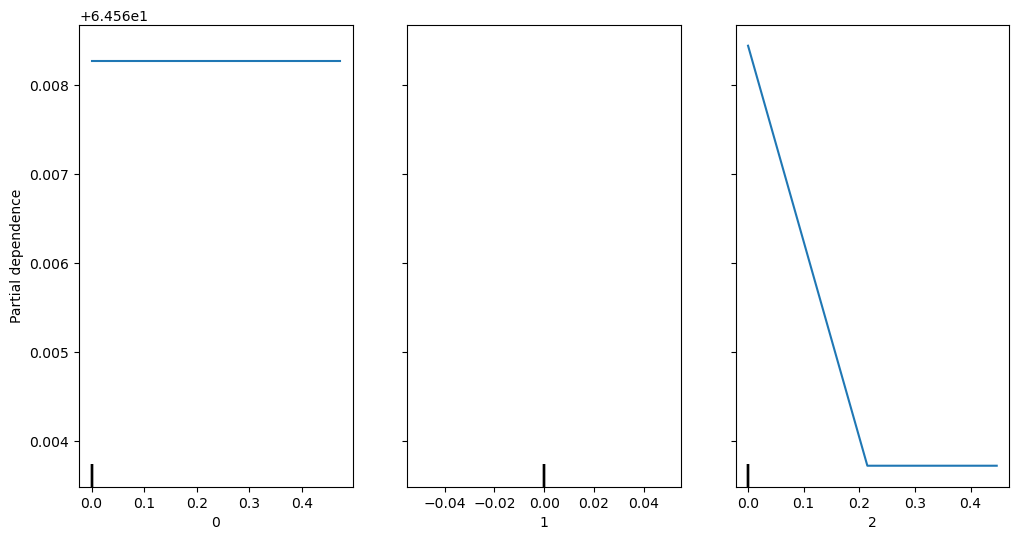

In [37]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# Plot partial dependence for specific features
fig, ax = plt.subplots(figsize=(12, 6))
display = PartialDependenceDisplay.from_estimator(
    rf_model,
    X_train,
    features=[0, 1, 2],  # Replace with indices or feature names you want to analyze
    ax=ax,
    grid_resolution=50
)
plt.show()
